In [1]:
version=2

In [2]:
import astropy
from astropy.table import Table
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as U

import numpy as np
import matplotlib.pyplot as plt

import os
import sys

# Setting up python paths to point to right location

print(os.environ['HOME'])
sys.path.append(os.environ['HOME'] + '/code/project_handover')
if version==2:
    ke_code_root = os.environ['HOME']+'/code/LSS/py/LSS/DESI_ke'
    os.environ['CODE_ROOT'] = ke_code_root
elif version==1:
    os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI'
else:
    print('version not valid')

sys.path.append(os.environ['CODE_ROOT'])
print(os.environ['CODE_ROOT'])

/global/homes/e/edown
/global/homes/e/edown/code/LSS/py/LSS/DESI_ke


- apply different faint limits to N and S catalogues
- define minimum and maximum k-correction polynomials with g-r colour 0.130634 and 1.06731 (for bright and faint limits) respectively
- use vls.vol_lim_sample for desired magnitude limits:
    - finds faintest and brightest apparent magnitude for each galaxy using lower and upper magnitude limit, max and min k-corrections (most conservative limits)
    - applies absolute magnitude cut: where M_r is between upper and lower magnitude limits
    - applies faint and bright limit cut for volume limited samples: where the 'faint apparent magnitude' is brighter than the N/S faint limit, and where the 'bright apparent magnitude' is fainter than the bright limit of r=15
    - returns mask to apply

In [3]:
import vol_lim_samples as vls

In [4]:
# N = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_N_clustering.dat.fits')
# S = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/sv3/LSScats/clustering/BGS_BRIGHT_S_clustering.dat.fits')
N = Table.read('/pscratch/sd/e/edown/SV3/LSS/guadalupe/LSScats/new_kcorrs/BGS_BRIGHT_N_clustering.dat.fits')
S = Table.read('/pscratch/sd/e/edown/SV3/LSS/guadalupe/LSScats/new_kcorrs/BGS_BRIGHT_S_clustering.dat.fits')
N['FAINT_RLIM'] = 19.539993
S['FAINT_RLIM'] = 19.5
N['PHOTSYS'] = 'N'
S['PHOTSYS'] = 'S'

In [5]:
z_range = np.linspace(0.01,0.6,100) 
e_z = -0.97*(z_range - 0.0)
#cosmo = FlatLambdaCDM(H0=100, Om0=0.3)

plots to verify k-correction polynomials

In [6]:
from smith_kcorr import GAMA_KCorrection
if version==2:
    kcorr_r_N = GAMA_KCorrection(band='R', file='jmext', photsys='N')
    kcorr_r_S = GAMA_KCorrection(band='R', file='jmext', photsys='S')
    colours_jmext_N = [np.ones(len(z_range))*0.9832057952880859,np.ones(len(z_range))* 0.9307308197021484,np.ones(len(z_range))* 0.8639106750488281,
                       np.ones(len(z_range))*0.7666158676147461,np.ones(len(z_range))*0.6534461975097656,np.ones(len(z_range))*0.5343418121337891,
                       np.ones(len(z_range))* 0.39861392974853516] #different for N/S
    colours_jmext_S = [np.ones(len(z_range))*0.9937572479248047,np.ones(len(z_range))*0.9408969879150391,np.ones(len(z_range))*0.8747987747192383,
                       np.ones(len(z_range))*0.7766561508178711,np.ones(len(z_range))*0.6608715057373047,np.ones(len(z_range))*0.5393028259277344,
                       np.ones(len(z_range))*0.4014892578125] #different for N/S\

    kr_max_N = kcorr_r_N.k(z_range, colours_jmext_N[0])
    kr_max_S = kcorr_r_S.k(z_range, colours_jmext_S[0])
    kr_1_N = kcorr_r_N.k(z_range, colours_jmext_N[1])
    kr_2_N = kcorr_r_N.k(z_range, colours_jmext_N[2])
    kr_3_N = kcorr_r_N.k(z_range, colours_jmext_N[3])
    kr_4_N = kcorr_r_N.k(z_range, colours_jmext_N[4])
    kr_5_N = kcorr_r_N.k(z_range, colours_jmext_N[5])
    kr_1_S = kcorr_r_S.k(z_range, colours_jmext_S[1])
    kr_2_S = kcorr_r_S.k(z_range, colours_jmext_S[2])
    kr_3_S = kcorr_r_S.k(z_range, colours_jmext_S[3])
    kr_4_S = kcorr_r_S.k(z_range, colours_jmext_S[4])
    kr_5_S = kcorr_r_S.k(z_range, colours_jmext_S[5])
    kr_min_N = kcorr_r_N.k(z_range, colours_jmext_N[6])
    kr_min_S = kcorr_r_S.k(z_range, colours_jmext_S[6])
    
elif version==1:
    kcorr_r_N = GAMA_KCorrection(band='R') # old version of k-corrections (not N/S dependent)
    kcorr_r_S = GAMA_KCorrection(band='R')

    colours_ajs = [np.ones(len(z_range))*1.06731,np.ones(len(z_range))*0.933226,np.ones(len(z_range))* 0.784644,np.ones(len(z_range))*0.603434,
               np.ones(len(z_range))* 0.443336,np.ones(len(z_range))*0.298124,np.ones(len(z_range))*0.130634]

    kr_max_N = kcorr_r_N.k(z_range, colours_ajs[0])
    kr_max_S = kcorr_r_S.k(z_range, colours_ajs[0])
    kr_1_N = kcorr_r_N.k(z_range, colours_ajs[1])
    kr_2_N = kcorr_r_N.k(z_range, colours_ajs[2])
    kr_3_N = kcorr_r_N.k(z_range, colours_ajs[3])
    kr_4_N = kcorr_r_N.k(z_range, colours_ajs[4])
    kr_5_N = kcorr_r_N.k(z_range, colours_ajs[5])
    kr_min_N = kcorr_r_N.k(z_range, colours_ajs[6])
    kr_min_S = kcorr_r_S.k(z_range, colours_ajs[6])

faintlim_N = vls.absmag(19.539993, z_range, kr_max_N, e_z)
faintlim_S = vls.absmag(19.5, z_range, kr_max_S, e_z)
brightlim_N = vls.absmag(15, z_range, kr_min_N, e_z)
brightlim_S = vls.absmag(15, z_range, kr_min_S, e_z)

In [7]:
if version==2:
    N['KMIN'] = kcorr_r_N.k(N['Z'], np.ones(len(N['Z']))*0.39861392974853516) # k-correction for galaxy's redshift but bluest colour
    N['KMAX'] = kcorr_r_N.k(N['Z'], np.ones(len(N['Z']))*0.9832057952880859) # k-correction for galaxy's redshift but reddest colour
    S['KMIN'] = kcorr_r_S.k(S['Z'], np.ones(len(S['Z']))*0.4014892578125) # k-correction for galaxy's redshift but bluest colour
    S['KMAX'] = kcorr_r_S.k(S['Z'], np.ones(len(S['Z']))*0.9937572479248047) # k-correction for galaxy's redshift but reddest colour(for conservative faint  limit)
    
    N['K_R0P0'] = kcorr_r_N.k_nonnative_zref(0.14, N['Z'], N['REST_GMR_0P1'])
    S['K_R0P0'] = kcorr_r_S.k_nonnative_zref(0.14, S['Z'], S['REST_GMR_0P1'])
elif version==1:
    N['KMIN'] = kcorr_r_N.k(N['Z'], np.ones(len(N['Z']))*0.130634) # k-correction for galaxy's redshift but bluest colour
    N['KMAX'] = kcorr_r_N.k(N['Z'], np.ones(len(N['Z']))*1.06731) # k-correction for galaxy's redshift but reddest colour
    S['KMIN'] = kcorr_r_S.k(S['Z'], np.ones(len(S['Z']))*0.130634) # k-correction for galaxy's redshift but bluest colour
    S['KMAX'] = kcorr_r_S.k(S['Z'], np.ones(len(S['Z']))*1.06731) # k-correction for galaxy's redshift but reddest colour(for conservative faint  limit)"""

In [8]:
data = Table(np.hstack((N, S)))
data.dtype.names
data['ZMIN'] = np.ones(len(data))
data['ZMAX'] = np.ones(len(data))

create volume-limited samples

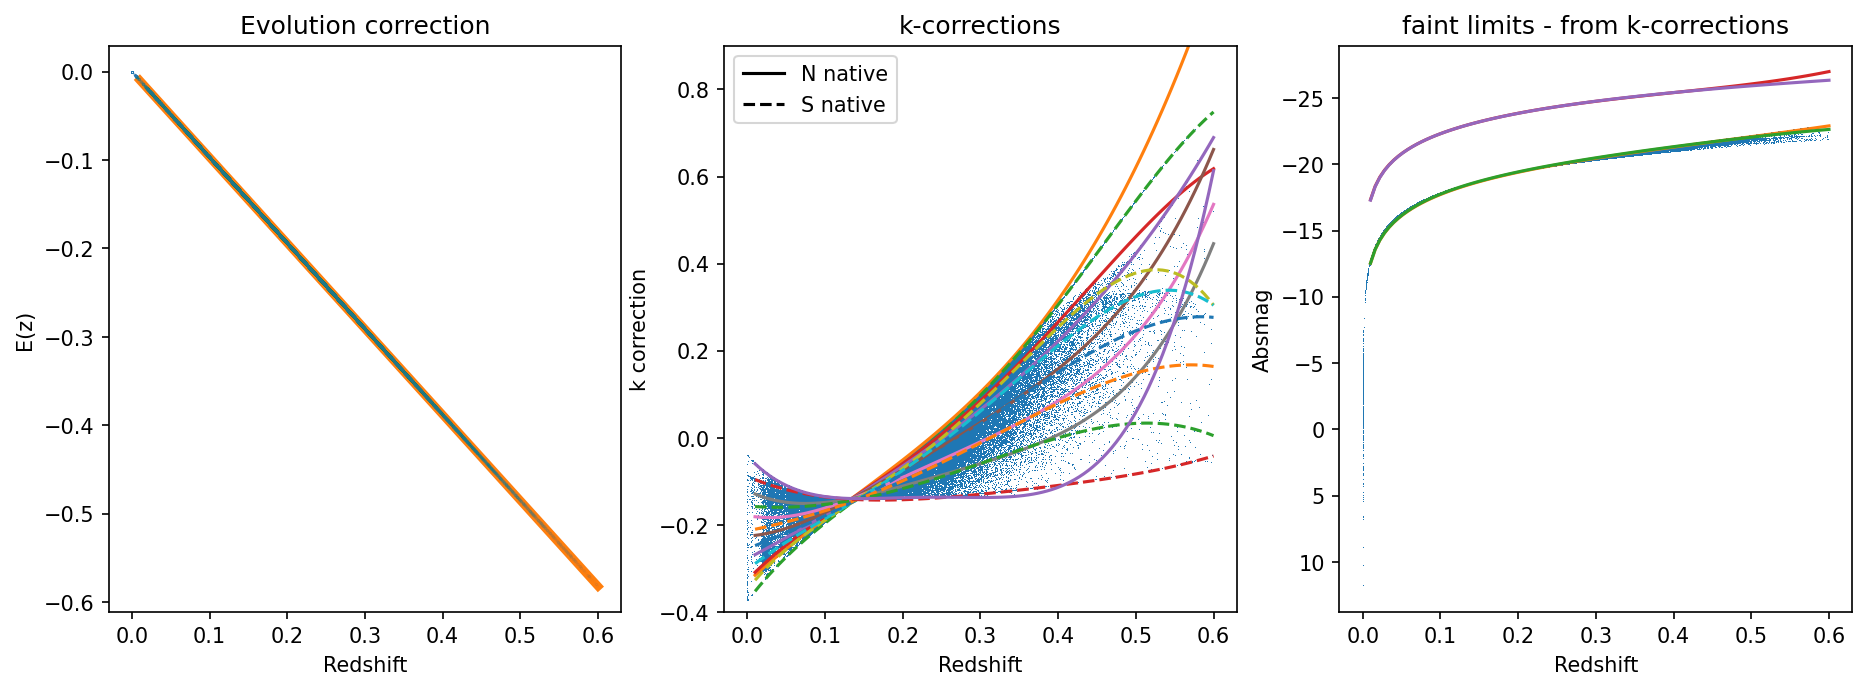

In [9]:
plt.rcParams['font.size'] = 10
plt.figure(figsize=(15,5), dpi=150)

plt.subplot(131)
plt.title('Evolution correction')
plt.plot(z_range, e_z, label='linear fit', color='tab:orange', lw=4)
plt.plot(data['Z'], data['EQ_ALL_0P1'], lw=0, marker='o', color='tab:blue', markersize=0.01)
plt.xlabel('Redshift')
plt.ylabel('E(z)')

plt.subplot(132)
plt.title('k-corrections')
plt.plot(data['Z'], data['KCORR_R0P1'], lw=0, marker=',')
plt.plot(z_range, kr_max_N, ls='-')
plt.plot(z_range, kr_max_S, ls='--')
plt.plot(z_range, kr_1_N, ls='-')
plt.plot(z_range, kr_2_N, ls='-')
plt.plot(z_range, kr_3_N, ls='-')
plt.plot(z_range, kr_4_N, ls='-')
plt.plot(z_range, kr_5_N, ls='-')
if version==2:
    plt.plot(z_range, kr_1_S, ls='--')
    plt.plot(z_range, kr_2_S, ls='--')
    plt.plot(z_range, kr_3_S, ls='--')
    plt.plot(z_range, kr_4_S, ls='--')
    plt.plot(z_range, kr_5_S, ls='--')
    plt.plot(z_range, kr_min_S, ls='--')
plt.plot(z_range, kr_min_N, ls='-')
plt.plot(np.nan,np.nan,color='k', ls='-', label='N native')
plt.plot(np.nan,np.nan,color='k', ls='--', label='S native')
#plt.plot(data['Z'], data['KMIN'], lw=0, marker=',', color='k')
plt.legend()
plt.ylim(-0.4,0.9)
plt.xlabel('Redshift')
plt.ylabel('k correction')

plt.subplot(133)
plt.title('faint limits - from k-corrections')
plt.plot(data['Z'], vls.absmag(19.5, np.array(data['Z']), np.array(data['KCORR_R0P1']), np.array(data['EQ_ALL_0P1'])),lw=0,marker=',')
plt.plot(z_range, faintlim_N, label='faint limit, N')
plt.plot(z_range, faintlim_S, label='faint limit, S')
plt.plot(z_range, brightlim_N, label='bright limit N')
plt.plot(z_range, brightlim_S, label='bright limit S')
plt.gca().invert_yaxis()

plt.xlabel('Redshift')
plt.ylabel('Absmag')
plt.show()

Evolution correction is linear function.

K-corrections are polynomials that are different to take account of N/S photometric differences

Faint limits used to define volume-limited samples:
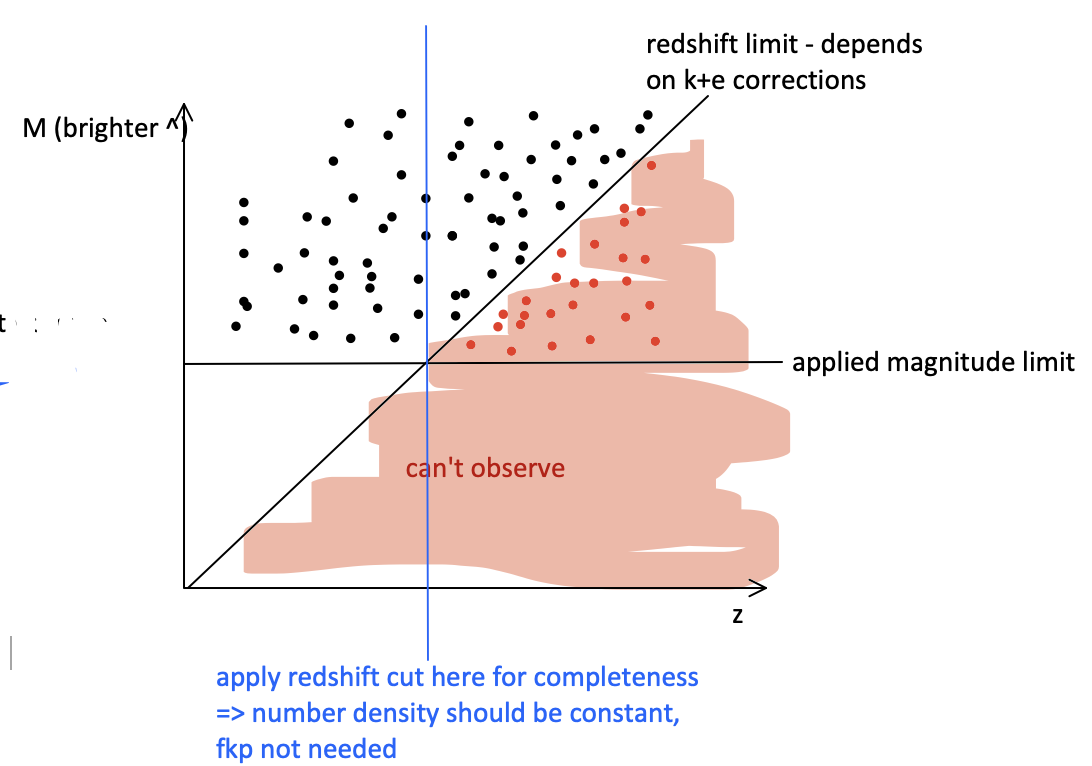

In [13]:
sample1617 = vls.vol_lim_sample_2(-16,-17, data) # function for defining volume-limited samples given absolute magnitude limits and a table
sample1718 = vls.vol_lim_sample_2(-17,-18, data) # you should probably work out your own way of doing this as k-correction code likely to have changed
sample1819 = vls.vol_lim_sample_2(-18,-19, data)
sample1920 = vls.vol_lim_sample_2(-19,-20, data)
sample2021 = vls.vol_lim_sample_2(-20,-21, data)
sample2122 = vls.vol_lim_sample_2(-21,-22, data)
sample2223 = vls.vol_lim_sample_2(-22,-23, data)

In [14]:
data_1617 = data[sample1617]
data_1718 = data[sample1718]
data_1819 = data[sample1819]
data_1920 = data[sample1920]
data_2021 = data[sample2021]
data_2122 = data[sample2122]
data_2223 = data[sample2223]

In [15]:
print(len(data_2223), len(data_2122), len(data_2021), len(data_1920), len(data_1819), len(data_1718), len(data_1617))

3101 19867 28517 18331 7234 2924 1457


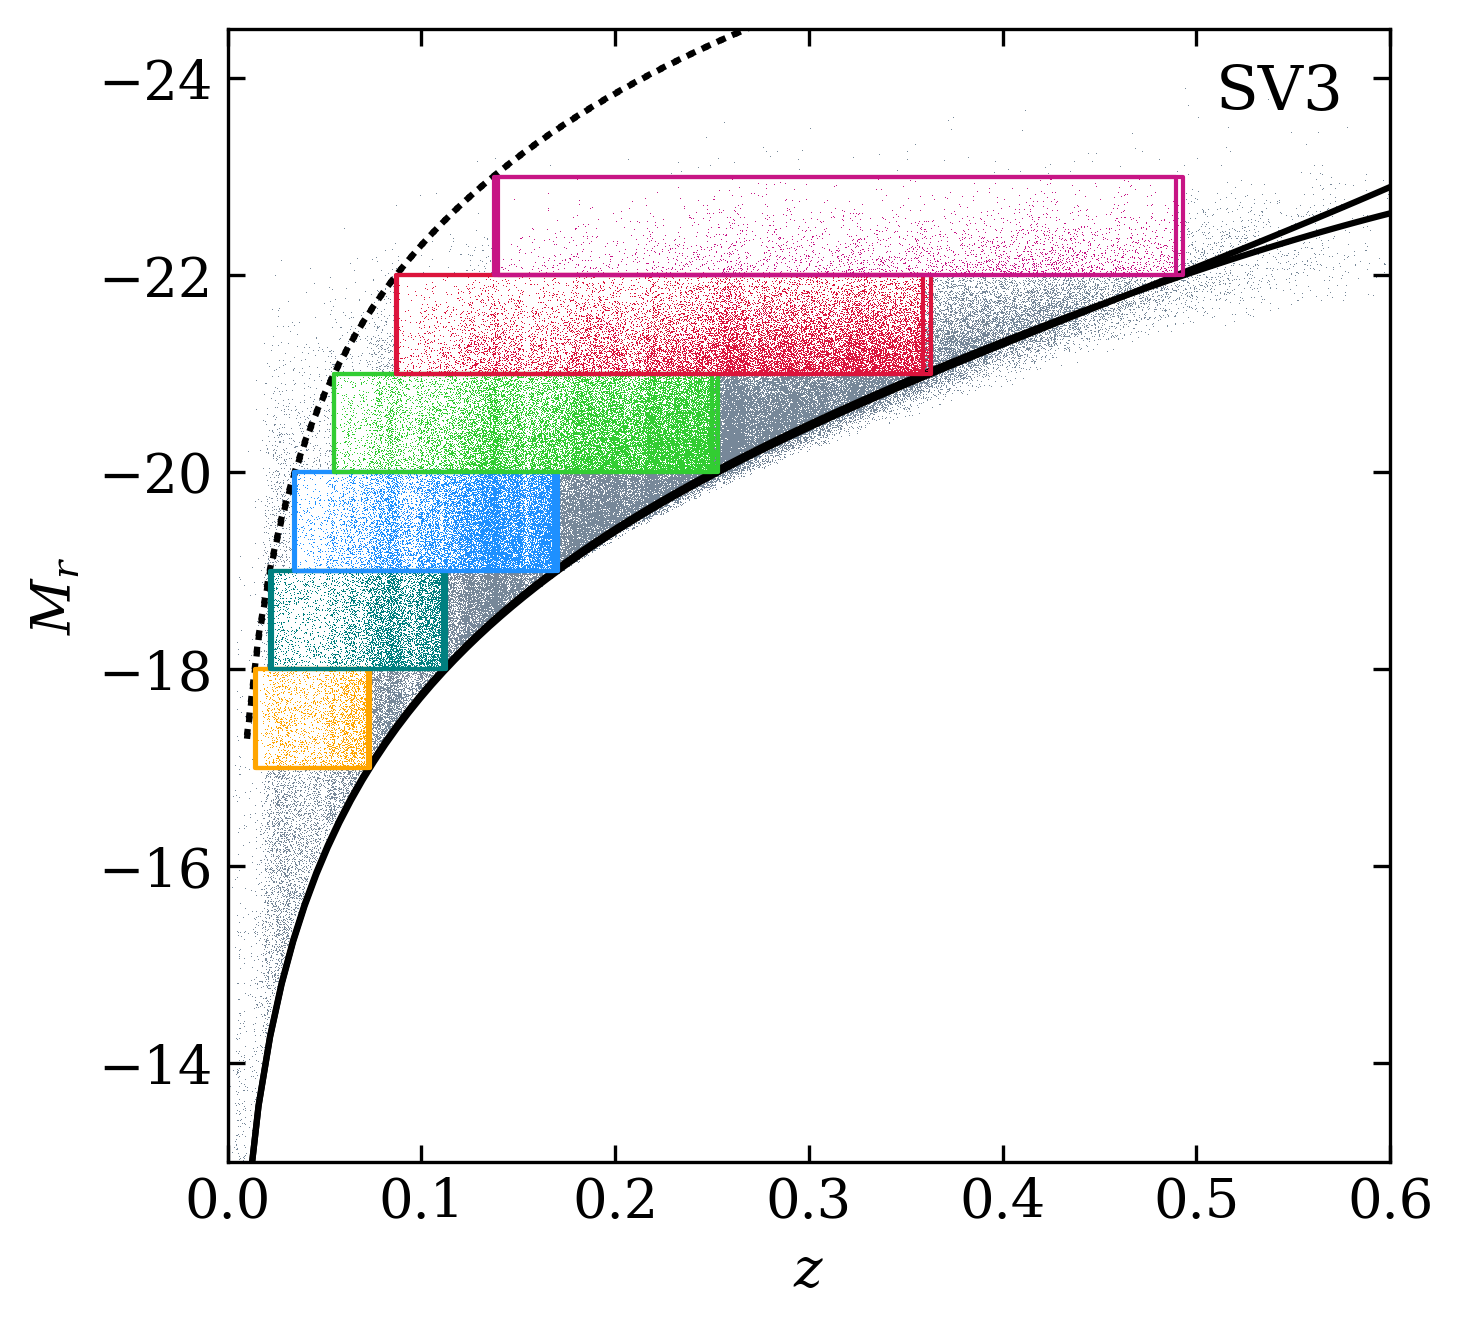

In [17]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams['font.size'] = 13
fig, ax1 = plt.subplots(figsize=(5,5), dpi=300)

ax1.plot(data['Z'], data['ABSMAG_RP1'], lw=0, marker=',', color='lightslategrey',zorder=0)

plt.xlabel('Redshift')
plt.ylabel('$M_r$')
ax1.plot(data['Z'][sample1718], data['ABSMAG_RP1'][sample1718], lw=0, marker=',', color='orange', zorder=2)
ax1.fill_between([0.0139,0.0735],y1=[-17,-17],y2=[-18,-18], facecolor='None', edgecolor='orange',zorder=2)
ax1.fill_between([0.0144,0.0726],y1=[-17,-17],y2=[-18,-18], facecolor='None', edgecolor='orange',zorder=2)
ax1.plot(data['Z'][sample1819], data['ABSMAG_RP1'][sample1819], lw=0, marker=',', color='teal', zorder=2)
ax1.fill_between([0.0227,0.1126],y1=[-18,-18],y2=[-19,-19], facecolor='None', edgecolor='teal',zorder=2)
ax1.fill_between([0.0219,0.1112],y1=[-18,-18],y2=[-19,-19], facecolor='None', edgecolor='teal',zorder=2)
ax1.plot(data['Z'][sample1920], data['ABSMAG_RP1'][sample1920], lw=0, marker=',', color='dodgerblue', zorder=2)
ax1.fill_between([0.0345,0.1704],y1=[-19,-19],y2=[-20,-20], facecolor='None', edgecolor='dodgerblue',zorder=2)
ax1.fill_between([0.0349,0.1684],y1=[-19,-19],y2=[-20,-20], facecolor='None', edgecolor='dodgerblue',zorder=2)
ax1.plot(data['Z'][sample2021], data['ABSMAG_RP1'][sample2021], lw=0, marker=',', color='limegreen', zorder=2)
ax1.fill_between([0.0548,0.2531],y1=[-20,-20],y2=[-21,-21], facecolor='None', edgecolor='limegreen',zorder=2)
ax1.fill_between([0.0550,0.2502],y1=[-20,-20],y2=[-21,-21], facecolor='None', edgecolor='limegreen',zorder=2)
ax1.plot(data['Z'][sample2122], data['ABSMAG_RP1'][sample2122], lw=0, marker=',', color='crimson', zorder=2)
ax1.fill_between([0.0870,0.3631],y1=[-21,-21],y2=[-22,-22], facecolor='None', edgecolor='crimson',zorder=2)
ax1.fill_between([0.0872,0.3590],y1=[-21,-21],y2=[-22,-22], facecolor='None', edgecolor='crimson',zorder=2)
ax1.plot(data['Z'][sample2223], data['ABSMAG_RP1'][sample2223], lw=0, marker=',', color='mediumvioletred', zorder=2)
ax1.fill_between([0.1397,0.4893],y1=[-22,-22],y2=[-23,-23], facecolor='None', edgecolor='mediumvioletred',zorder=2)
ax1.fill_between([0.1376,0.4930],y1=[-22,-22],y2=[-23,-23], facecolor='None', edgecolor='mediumvioletred',zorder=2)
ax1.plot(z_range, faintlim_N, color='k', ls='-', label='faint limit (N) $r=19.5$4',zorder=0.5)
ax1.plot(z_range, faintlim_S, color='k', ls ='-', label='faint limit (S) $r=19.5$',zorder=0.4)
ax1.plot(z_range, brightlim_N, color='k', ls=':', label='bright limit (N) $r=15$',zorder=0.5)
ax1.plot(z_range, brightlim_S, color='k', ls=':', label='bright limit (S) $r=15$',zorder=0.4)

plt.ylim(-24.5,-13)
plt.xlim(0,0.6)
ax1.tick_params(axis='both', which='major', direction='in', top=True, right=True, length=4)

plt.gca().invert_yaxis()
plt.xlabel('$z$')
# plt.legend(loc='lower right', fontsize=12, frameon=False)
plt.text(0.51,-23.7,'SV3', fontsize=15)
plt.show()

#Plot of volume-limited samples shown against the whole sample